<a href="https://colab.research.google.com/github/LuciaUchegbu/Hackbio_StageOne/blob/main/StageOneCode_Surprise_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAIVMGR
MA
The Hamming distance is: 7


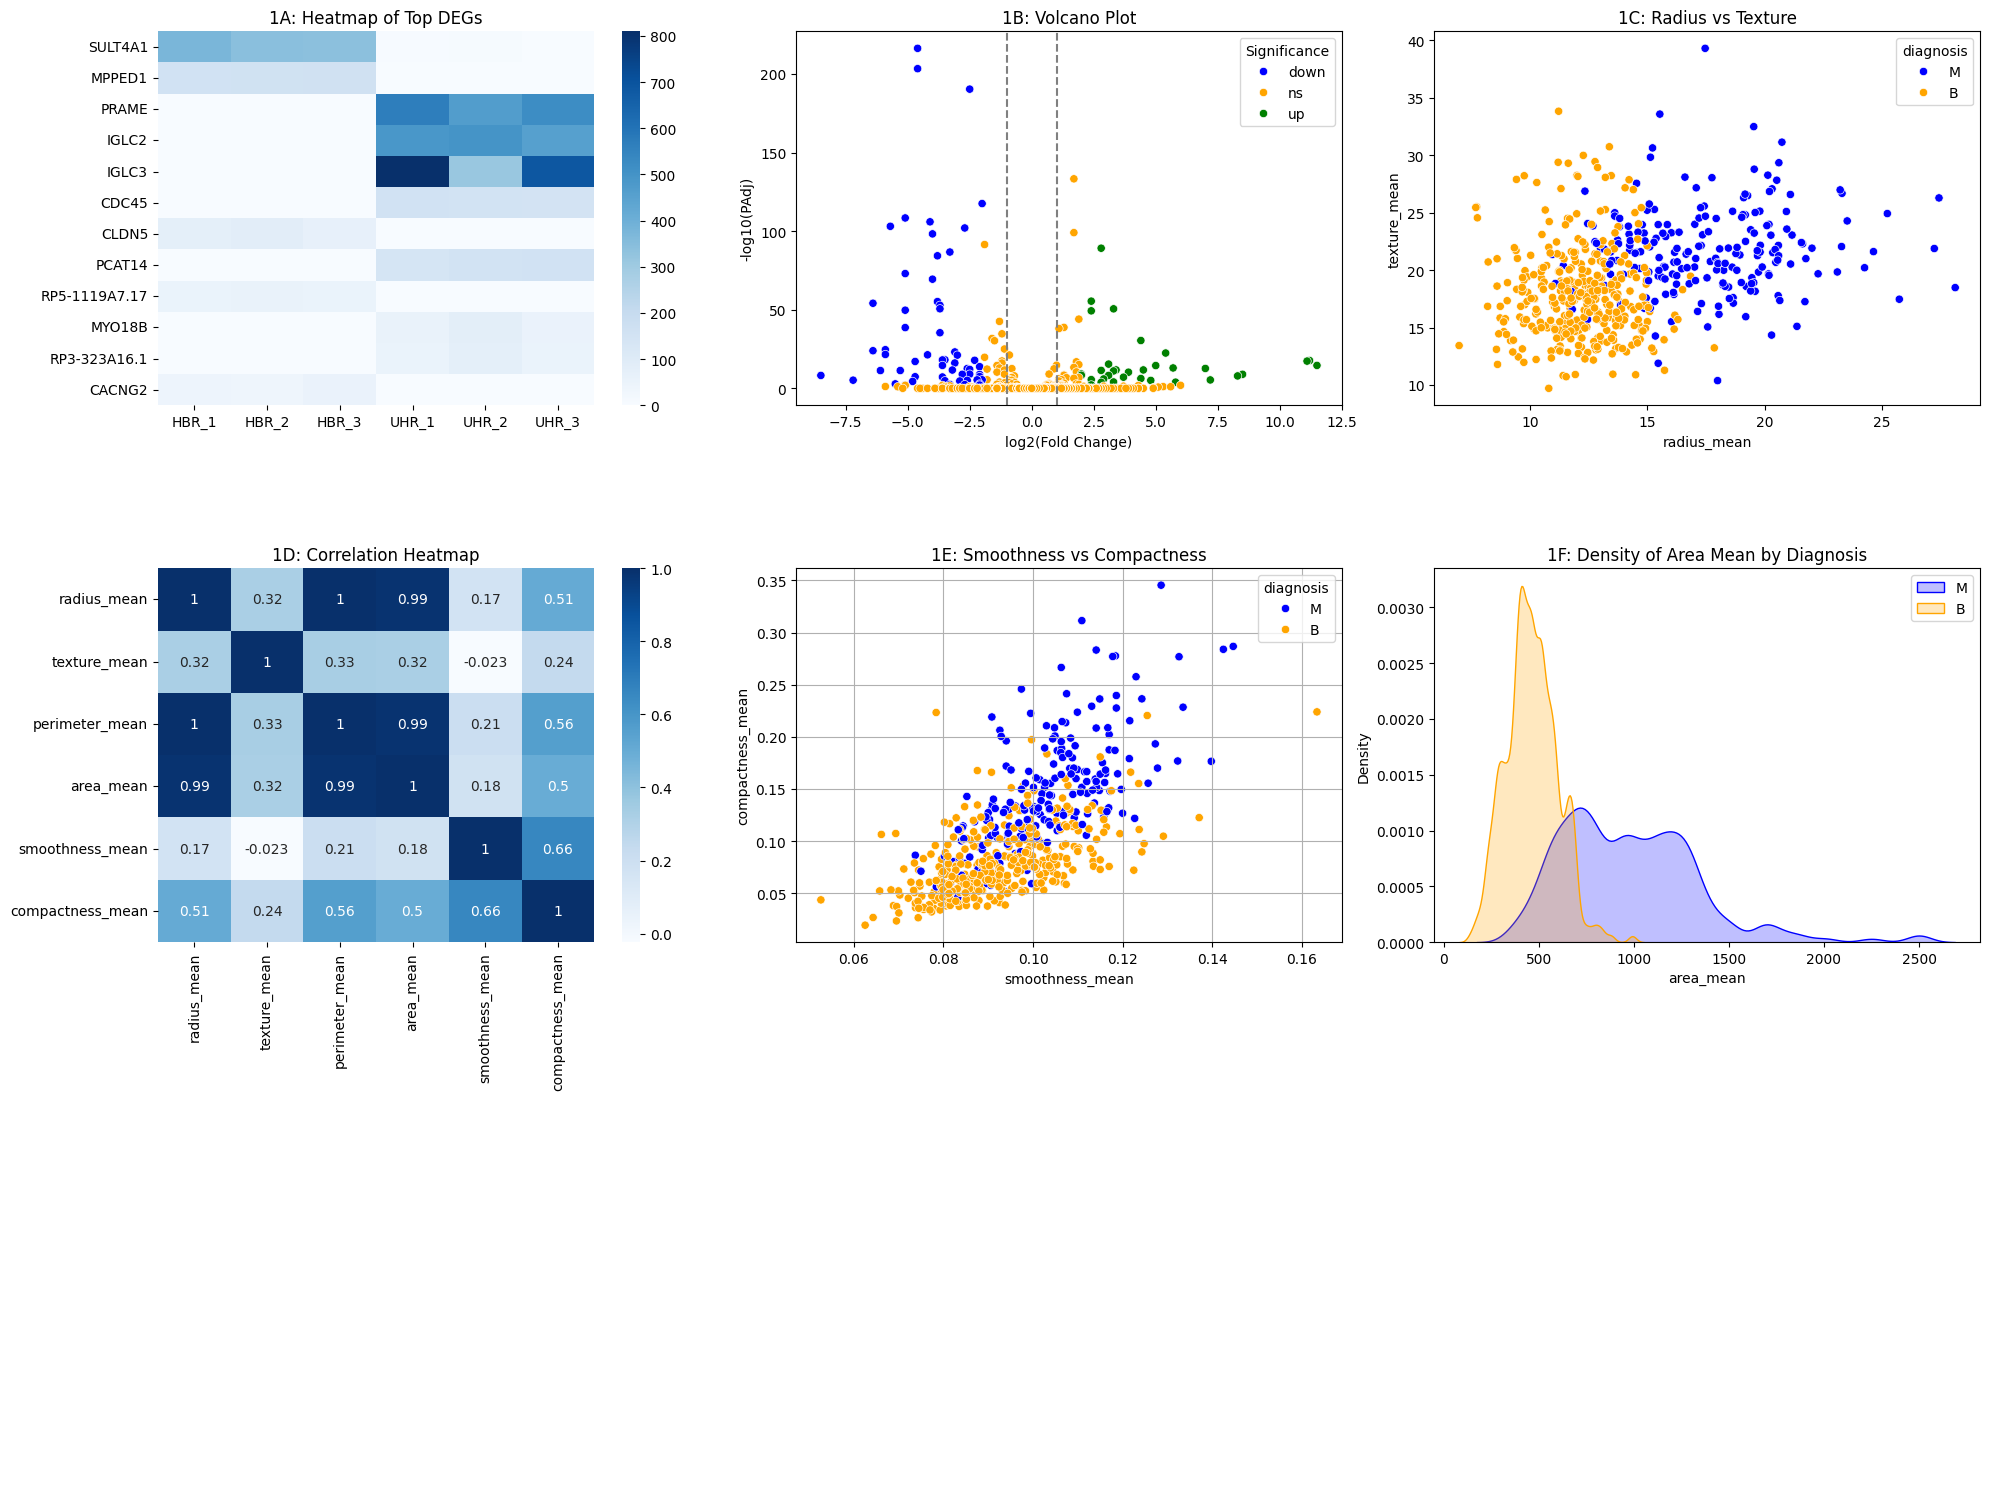

In [1]:
#Hackbio Team Histidine StageOne Task

#Tasks
#Write a python function for translating DNA to protein
#Write a Python function for calculating the Hamming distance between your Slack username and Twitter/X handle.
#Feel free to pad it with extra words if they are not of the same length.

#Author:Lucia Uchegbu
#GitHub:https://github.com/LuciaUchegbu
#Linkedin: www.linkedin.com/in/luciauchegbu


#Standard DNA codon table (DNA codons to amino acid one-letter codes)
CODON_TABLE = {
    #phenylalanine
    "TTT":"F","TTC":"F",
    #Leucine
    "TTA":"L","TTG":"L","CTT":"L","CTC":"L","CTA":"L","CTG":"L",
    #Isoleucine
    "ATT":"I","ATC":"I","ATA":"I",
    #Methionine (start)
    "ATG":"M",
    #Valine
    "GTT":"V","GTC":"V","GTA":"V","GTG":"V",
    # Serine
    "TCT":"S","TCC":"S","TCA":"S","TCG":"S","AGT":"S","AGC":"S",
    # Proline
    "CCT":"P","CCC":"P","CCA":"P","CCG":"P",
    # Threonine
    "ACT":"T","ACC":"T","ACA":"T","ACG":"T",
    # Alanine
    "GCT":"A","GCC":"A","GCA":"A","GCG":"A",
    # Tyrosine
    "TAT":"Y","TAC":"Y",
    # Histidine
    "CAT":"H","CAC":"H",
    # Glutamine
    "CAA":"Q","CAG":"Q",
    # Asparagine
    "AAT":"N","AAC":"N",
    # Lysine
    "AAA":"K","AAG":"K",
    # Aspartic acid
    "GAT":"D","GAC":"D",
    # Glutamic acid
    "GAA":"E","GAG":"E",
    # Cysteine
    "TGT":"C","TGC":"C",
    # Tryptophan
    "TGG":"W",
    # Arginine
    "CGT":"R","CGC":"R","CGA":"R","CGG":"R","AGA":"R","AGG":"R",
    # Glycine
    "GGT":"G","GGC":"G","GGA":"G","GGG":"G",
    # Stop codons
    "TAA":"*","TAG":"*","TGA":"*"
}

def translate_dna(dna_seq, frame=0, to_stop=True):
  """
  Translate a DNA sequence into a protein sequence.

  parameters:
  dna_seq(str): DNA sequence (A,T,G,C). Lowercase allowed.
  frame (int): 0,1,or 2 - translation reading frame.
  to_stop (bool): if True, translation stops at first stop codon(not included)
                  if False, stop codons are translated as '*'
                   Returns:
      protein (str): translated amino acid sequence (one-letter codes)
  """
  #1. Clean Input
  seq = dna_seq.upper().replace("\n", "").replace(" ", "")
  #2. Simple Validation (warn on bad chars)
  for ch in seq:
    if ch not in "ATGCN":
      raise ValueError(f"Invalid base '{ch} in DNA sequence. Allowed: A,T,G,C,N")
  protein = []
  #3. Walk through sequence by codon
  for i in range(frame, len(seq)- 2,3):
    codon = seq[i:i+3]
    #convert codon with 'N' (unknown) to X if not determinable
    if "N" in codon:
      aa= "x"
    else:
      aa= CODON_TABLE.get(codon, "x") # unknown codon to X
      if aa== "*":
        if to_stop:
          break
        else:
          protein.append("*")
      else:
        protein.append(aa)
  return "".join(protein)



#Task 1: short sequence that ends in a stop codon
print(translate_dna("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", frame=0, to_stop=True))


#2: Simple sequence
print(translate_dna("ATGGCC",frame=0))


def hamming_distance(str1, str2):
    # Make both strings the same length by padding the shorter one with spaces
    max_len = max(len(str1), len(str2))
    str1 = str1.ljust(max_len)
    str2 = str2.ljust(max_len)

    # Compare each character in both strings
    distance = 0
    for c1, c2 in zip(str1, str2):
        if c1 != c2:
            distance += 1
    return distance

slack_username = "Lucia"
twitter_handle ="Lucia_Chidie"

result = hamming_distance(slack_username, twitter_handle)
print("The Hamming distance is:", result)


#Surprise Task

# PART A - Gene Expression Analysis
# 1A–1F: Reproducing all plots in a 3x3 grid

# -----------------------------
# Step 0: Imports
# -----------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Step 1: Load Datasets
# -----------------------------
# 1A: Normalized counts for heatmap
norm_counts_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/hbr_uhr_top_deg_normalized_counts.csv"
df_norm = pd.read_csv(norm_counts_url, index_col=0)
df_norm = df_norm.select_dtypes(include=np.number)  # Keep numeric only

# 1B: DEG results for volcano plot
deg_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/hbr_uhr_deg_chr22_with_significance.csv"
df_deg = pd.read_csv(deg_url)
df_deg.columns = df_deg.columns.str.strip()  # Clean column names
color_map = {'up':'green', 'down':'blue', 'ns':'orange'}

# PART B: Breast Cancer Data
bc_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/data-3.csv"
df_bc = pd.read_csv(bc_url)
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
df_bc = df_bc.dropna(subset=features)  # Remove missing values

# -----------------------------
# Step 2: Create 3x3 subplot grid
# -----------------------------
fig, axes = plt.subplots(3,3, figsize=(20,15))
axes = axes.flatten()  # Flatten to easily index

# -----------------------------
# 1A: Heatmap of Top DEGs
# -----------------------------
sns.heatmap(df_norm, cmap="Blues", ax=axes[0])
axes[0].set_title("1A: Heatmap of Top DEGs")

# -----------------------------
# 1B: Volcano Plot
# -----------------------------
sns.scatterplot(
    x="log2FoldChange",
    y="-log10PAdj",
    hue="significance",
    data=df_deg,
    palette=color_map,
    ax=axes[1]
)
axes[1].axvline(x=1, linestyle='--', color='grey')
axes[1].axvline(x=-1, linestyle='--', color='grey')
axes[1].set_xlabel("log2(Fold Change)")
axes[1].set_ylabel("-log10(PAdj)")
axes[1].set_title("1B: Volcano Plot")
axes[1].legend(title="Significance")

# -----------------------------
# 1C: Scatter Plot (radius_mean vs texture_mean)
# -----------------------------
sns.scatterplot(
    x="radius_mean",
    y="texture_mean",
    hue="diagnosis",
    data=df_bc,
    palette={'M':'blue','B':'orange'},
    ax=axes[2]
)
axes[2].set_title("1C: Radius vs Texture")

# -----------------------------
# 1D: Correlation Heatmap
# -----------------------------
sns.heatmap(df_bc[features].corr(), annot=True, cmap="Blues", ax=axes[3])
axes[3].set_title("1D: Correlation Heatmap")

# -----------------------------
# 1E: Scatter Plot (smoothness_mean vs compactness_mean)
# -----------------------------
sns.scatterplot(
    x="smoothness_mean",
    y="compactness_mean",
    hue="diagnosis",
    data=df_bc,
    palette={'M':'blue','B':'orange'},
    ax=axes[4]
)
axes[4].set_title("1E: Smoothness vs Compactness")
axes[4].grid(True)

# -----------------------------
# 1F: Density Plot (area_mean by diagnosis)
# -----------------------------
sns.kdeplot(df_bc[df_bc['diagnosis']=='M']['area_mean'], fill=True, color='blue', bw_adjust=0.5, ax=axes[5], label='M')
sns.kdeplot(df_bc[df_bc['diagnosis']=='B']['area_mean'], fill=True, color='orange', bw_adjust=0.5, ax=axes[5], label='B')
axes[5].set_title("1F: Density of Area Mean by Diagnosis")
axes[5].set_xlabel("area_mean")
axes[5].set_ylabel("Density")
axes[5].legend()

# -----------------------------
# Hide empty subplots (if any)
# -----------------------------
for i in range(6,9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()